In [10]:
# Classification
import numpy as np

In [11]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [12]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [13]:
y.shape

(70000,)

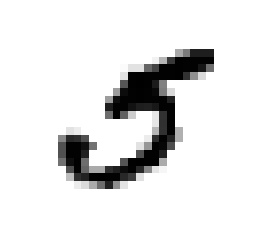

In [14]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape( 28, 28 )

plt.imshow( some_digit_image, cmap = matplotlib.cm.binary,
          interpolation = "nearest")
plt.axis("off")
plt.show()

In [15]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

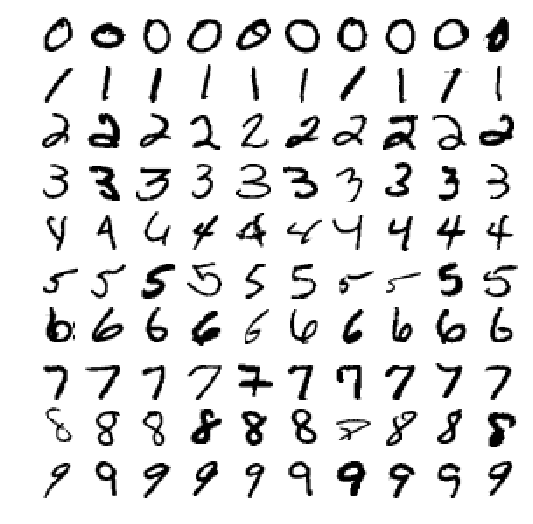

In [16]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [17]:
y[36000]

5.0

In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [19]:
import numpy as np

In [20]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [21]:
y_train_5 = ( y_train == 5 ) # Set all 5's to one
y_test_5 = ( y_test == 5)

In [22]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier( random_state = 42, max_iter = 10 )
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=10,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
sgd_clf.predict( [some_digit] )

array([ True], dtype=bool)

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold( n_splits = 3, random_state = 42 )

for train_index, test_index in skfolds.split( X_train, y_train_5 ):
    clone_clf = clone( sgd_clf )
    X_train_folds = X_train[ train_index ]
    y_train_folds = y_train_5[ train_index ]
    X_test_fold = X_train[ test_index ]
    y_test_fold = y_train_5[ test_index ]
    
    clone_clf.fit( X_train_folds, y_train_folds)
    y_pred = clone_clf.predict( X_test_fold )
    n_correct = clone_clf.predict(X_test_fold) == y_test_fold
    print(n_correct / len(y_pred))

[  5.00000000e-05   5.00000000e-05   5.00000000e-05 ...,   5.00000000e-05
   5.00000000e-05   5.00000000e-05]
[  5.00000000e-05   5.00000000e-05   5.00000000e-05 ...,   0.00000000e+00
   5.00000000e-05   5.00000000e-05]
[  0.00000000e+00   5.00000000e-05   5.00000000e-05 ...,   5.00000000e-05
   5.00000000e-05   5.00000000e-05]


In [25]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring = "accuracy")

array([ 0.86772645,  0.86474324,  0.8620293 ])

In [26]:
from sklearn.base import BaseEstimator

class Never5Classifier( BaseEstimator ):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros( (len(X), 1), dtype = bool)

In [27]:
never_5_clf = Never5Classifier()
cross_val_score( never_5_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([ 0.911  ,  0.90835,  0.9096 ])

In [28]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict( sgd_clf, X_train, y_train_5, cv = 3)

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53336,  1243],
       [ 1079,  4342]], dtype=int64)

In [30]:
from sklearn.metrics import precision_score, recall_score

precision_score( y_train_5, y_train_pred )

0.77743957027752908

In [31]:
recall_score(y_train_5, y_train_pred )

0.80095923261390889

In [32]:
from sklearn.metrics import f1_score
f1_score( y_train_5, y_train_pred)

0.78902416863528979

In [33]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 43960.5125238])

In [34]:
threshold = 0
y_some_digit_pred = (y_scores > threshold )
y_some_digit_pred

array([ True], dtype=bool)

In [35]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

In [36]:
y_scores = cross_val_predict( sgd_clf, X_train, y_train_5, cv=3,
                            method="decision_function")

In [37]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [38]:
def plot_precision_recall_vs_threshold( precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])

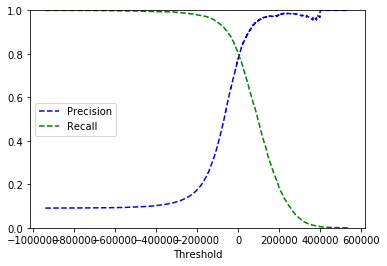

In [39]:
plot_precision_recall_vs_threshold( precisions, recalls, thresholds)
plt.show()

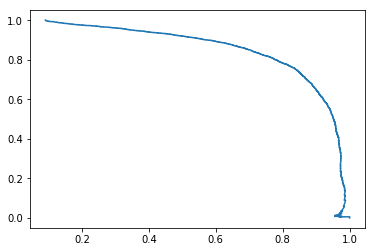

In [40]:
plt.plot(precisions, recalls)
plt.show()

In [41]:
y_train_pred_90 = (y_scores > 70000)

In [42]:
precision_score(y_train_5, y_train_pred_90)

0.92819460726846426

In [43]:
precision_score(y_train_5, y_train_pred_90)

0.92819460726846426

In [44]:
recall_score(y_train_5, y_train_pred_90)

0.58420955543257702

In [45]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [46]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

array([ -37033.58120962, -407240.14032821, -205097.39184255, ...,
       -272470.97353617, -171800.04916978, -226746.8196106 ])

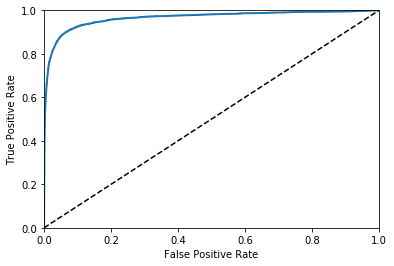

In [48]:
plot_roc_curve(fpr, tpr)
plt.show()

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.96511840077849154

In [50]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier( random_state = 42, n_estimators = 100 )

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method="predict_proba")

y_scores_forest = y_probas_forest[:,1] # score = proba of positive class
fpr_forest, tpr_forest, threshold_forest = roc_curve( y_train_5, y_scores_forest)

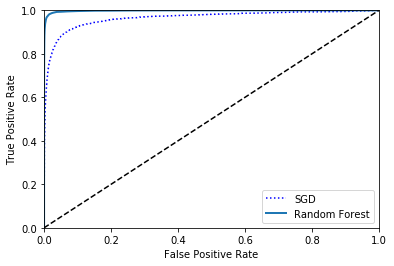

In [51]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [52]:
roc_auc_score(y_train_5, y_scores_forest)

0.99835132000104143

In [53]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([ 5.])

In [54]:
#
# Multiclass Classification
#

In [55]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -62475.81544461, -234983.87244122, -154387.02447441,
         -30191.70844195, -344775.59476716,   43960.5125238 ,
        -303391.94078121, -189858.08339178, -363752.85508486,
        -411375.1418642 ]])

In [56]:
np.argmax(some_digit_scores)

5

In [57]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [58]:
sgd_clf.classes_[5]

5.0

In [59]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier( SGDClassifier(max_iter = 5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([ 5.])

In [60]:
len(ovo_clf.estimators_)

45

In [61]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [62]:
forest_clf.predict_proba([some_digit])

array([[ 0.04,  0.  ,  0.  ,  0.08,  0.  ,  0.85,  0.  ,  0.02,  0.01,  0.  ]])

In [63]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.86772645,  0.86474324,  0.8620293 ])

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.90706859,  0.91084554,  0.91343702])

In [65]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5730,    2,   21,    9,   13,   50,   44,    9,   40,    5],
       [   1, 6472,   46,   28,    5,   36,    6,    8,  126,   14],
       [  58,   41, 5321,   98,   82,   27,   91,   51,  172,   17],
       [  48,   39,  128, 5348,    2,  234,   34,   50,  150,   98],
       [  19,   27,   34,    8, 5356,    9,   58,   30,   80,  221],
       [  67,   39,   29,  185,   68, 4615,  116,   31,  177,   94],
       [  34,   24,   45,    2,   40,   87, 5632,    6,   47,    1],
       [  24,   22,   62,   31,   58,   15,    4, 5791,   20,  238],
       [  46,  147,   72,  145,   14,  167,   54,   24, 5047,  135],
       [  42,   33,   26,   81,  142,   36,    2,  184,   88, 5315]], dtype=int64)

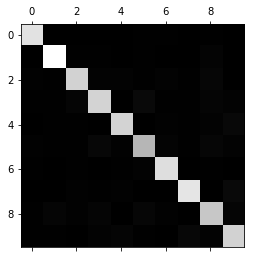

In [66]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [67]:
row_sums = conf_mx.sum(axis=1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

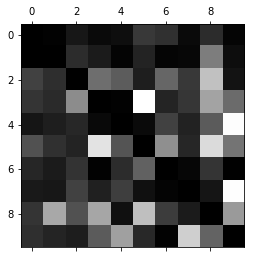

In [68]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [69]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

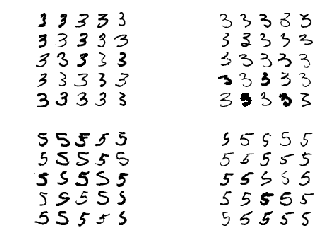

In [70]:
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

In [71]:
#
# Multilabel Classification
#

In [72]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [73]:
knn_clf.predict([some_digit])

array([[False,  True]], dtype=bool)

In [74]:
y_train_knn_pred = cross_val_predict( knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.97759119835370312

In [75]:
#
# Multioutput Classification
#

In [76]:
noise = np.random.randint(0,100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint( 0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

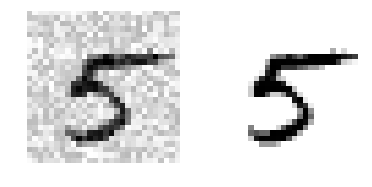

In [77]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

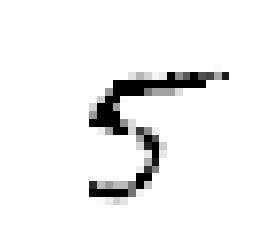

In [78]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict( [X_test_mod[some_index]])
plot_digit(clean_digit)

In [79]:
# 1.)
# Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set.
# Hint: the KNeighborsClassifier works quite well for this task;
# you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

In [80]:
#2.)
# Write a function that can shift an MNIST image in any direction (left, right, up or down) by one pixel. 
# [ (shift() from scipy.ndimage),ex: shift(image, [2,1], cval=0) shifts the image 2 down and 1 right ]
# Then, for each image in the training set, create four shifted copies (one per direction) and
# add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set.
# you should observe that your model performs even better now!
# This technique of artifically growing the training set is called data augmentation or training set expansion.

In [81]:
# 3.)
# Tackle the Titanic dataset.
# A great place to start is on Kaggle (https://www.kaggle.com/c/titanic)

In [82]:
# 4.)
# Build a spam classifier (a more challenging exercise): (details in book)